# Create Dataset

This script helps in creating a dataset. An input folder of data samples are downsampled to a lower quality to create data and label datasets. These are each combined into a single `.npy` file.

In [1]:
import sys
import numpy as np
sys.path.insert(0, '/Users/omkarpatil/Documents/event_based_visual_microphone/dataset/')
import downsample_signal as ds
sys.path.insert(0, '/Users/omkarpatil/Documents/event_based_visual_microphone/utilities/')
import utility_folders as uf
import utility_spectrogram as us

**Label Dataset**

<span style="color:red"> Provide the duration of audio to extract from samples, samples sampling rate, desired downsampling frequency, filepath of samples and the save path for label dataset: </span>

In [2]:
duration = 3
orignal_freq = 48000
downsampling_freq = 8192
dataset_path = '/Volumes/Omkar 5T/audio_dataset/actual/testing/orignal'
save_path = '/Volumes/Omkar 5T/audio_dataset/actual/testing/label'

This code creates the label dataset.

In [3]:
ds.nonaliased_dsample_folder(dataset_path, save_path, duration, downsampling_freq, orignal_freq)

**Data Dataset**

<span style="color:red"> Provide the downsampling factor for data dataset, the path to labels, and path to save data dataset: </span>

In [4]:
downsampling_factor = 4
label_path = '/Volumes/Omkar 5T/audio_dataset/actual/testing/label'
data_path = '/Volumes/Omkar 5T/audio_dataset/actual/testing/data'

This code creates the data dataset.

In [5]:
ds.aliased_dsample_folder(label_path, data_path, duration, downsampling_factor, downsampling_freq)

**Prepare Dataset Files**

<span style="color:red"> Provide the path for saving the data and labels dataset as a single file: </span>

In [6]:
label_dataset_path = '/Volumes/Omkar 5T/audio_dataset/actual/testing/label.npy'
data_dataset_path = '/Volumes/Omkar 5T/audio_dataset/actual/testing/data.npy'

This code compiles the data and label datasets into a numpy file.

In [7]:
uf.combine_audio(label_path, label_dataset_path)
uf.combine_audio(data_path, data_dataset_path)

The code allows to visualise a part of the saved datasets.

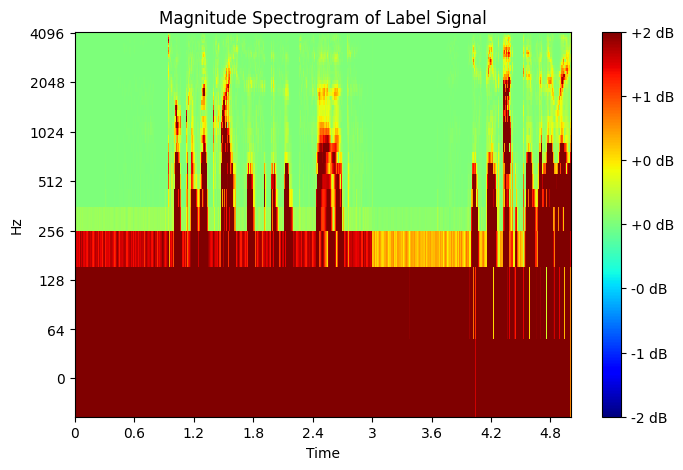

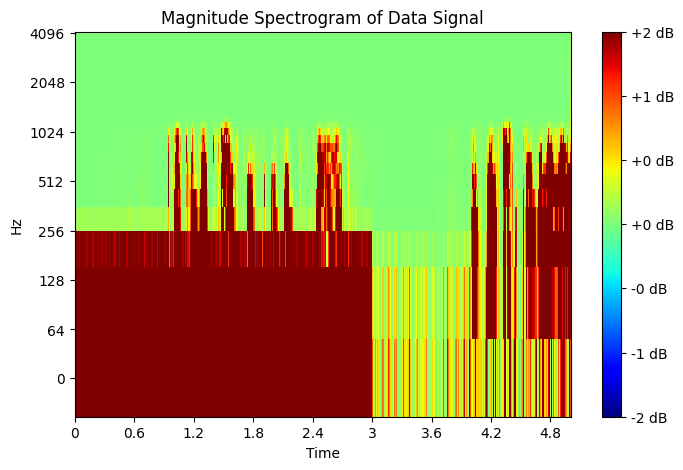

In [8]:
sample_label = np.load(label_dataset_path)
sample_label = sample_label[:10].flatten()
sample_data = np.load(data_dataset_path)
sample_data = sample_data[:10].flatten()
us.show_spectrogram(sample_label, downsampling_freq, 80, 40, 'Label')
us.show_spectrogram(sample_data, downsampling_freq, 80, 40, 'Data')